##### Intro to Quantum Programming - Spring 2025
## Homework 2: Due 02/21/25

For each exercise below, add as many cells as you want. To evaluate your submission, I will do **Restart and Run All**. . For help with Markdown, see [this link](https://www.markdownguide.org/).

In [17]:
# Here's a cell for import statements... add more if necessary (or just import below as needed)
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_distribution, plot_state_qsphere, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler as Sampler
import numpy as np
from sv_disc import *

For all the exercises below, you may use the multi-controlled Toffoli gate (known as `mcx`), but don't use higher-level gates from the circuit library, such as AND/OR, adders, comparators, etc. This assignment is about learning how to build those things.

NOTE: This assignment is also about creating modular and reusable software, not just creating quantum circuits. Write Python functions and learn about the Qiskit methods of composing circuits.

---- 
**IMPORTANT**: If any ancilla qubits are used in the circuits below, they must be *uncomputed* to restore them to zero. Failure to uncompute will lead to point deductions.

----
#### Exercise 2.1 (30%)

Define a **function** that creates a quantum circuit that adds a specified $4$-bit *unsigned* integer value to a $4$-qubit input, which represents an unsigned integer. NOTE: This is not to add two quantum numbers together. This is to increment a number by a fixed integer amount. The function must return a `QuantumCircuit` object.

Demonstrate your function with the following increment amounts: $5$, $6$, and $10$. But your function must work with any 4-bit number, and the grader will try other inputs. For each increment value, draw the resulting circuit and verify that it works as expected on classical and superposition states.

For *creativity* points, try to minimize the number of gates required in the circuit. In other words, repeating the +1 circuit $n$ times will work, but try to do better. Consider the examples of $+4$ and $+12$ in the textbook.

I used Quirk to check my circuit implementation. Below are the circuits.
+1 [4-Bit]: [Circuit 1](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D),     +2 [4-Bit]: [Circuit 2](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B1,%22X%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D)    +4 [4-Bit]: [Circuit 3](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B1,1,%22%E2%80%A2%22,%22X%22%5D,%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D)

-1 [4-Bit]: [Circuit 4](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D),     -2 [4-Bit]: [Circuit 5](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B1,%22X%22%5D,%5B1,%22%E2%80%A2%22,%22X%22%5D,%5B1,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D)    -4 [4-Bit]: [Circuit 6](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B1,1,%22X%22%5D,%5B1,1,%22%E2%80%A2%22,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D)

+1, -1, +5(1+1+1+1+1) [4-Bit]:
[Circuit 7](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B%22~aolb%22%5D,%5B%22~aolb%22%5D,%5B%22~aolb%22%5D,%5B%22~aolb%22%5D,%5B%22~aolb%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D)

+5(4+1) [4-Bit]: [Circuit 8](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B1,1,%22%E2%80%A2%22,%22X%22%5D,%5B1,1,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D) +6(4+2) [4-Bit]: [Circuit 9](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B1,1,%22%E2%80%A2%22,%22X%22%5D,%5B1,1,%22X%22%5D,%5B1,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B1,%22%E2%80%A2%22,%22X%22%5D,%5B1,%22X%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D)  +10(8+2) [4-Bit]: [Circuit 10](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B1,1,%22X%22%5D,%5B%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22%5D,%5B1,1,1,%22X%22%5D,%5B1,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B1,%22%E2%80%A2%22,%22X%22%5D,%5B1,%22X%22%5D%5D,%22gates%22:%5B%7B%22id%22:%22~aolb%22,%22name%22:%22+1%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22X%22%5D%5D%7D%7D,%7B%22id%22:%22~idu7%22,%22name%22:%22-1%20%5B4-Bit%5D%22,%22circuit%22:%7B%22cols%22:%5B%5B%22X%22%5D,%5B%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D%5D%7D%7D%5D%7D)


# Test Cases Used in the Code
### **Bloch Diagram Display Mode**
1. **input_value = 4, increment = 1, display_mode = "bloch"**
2. **input_value = 4, increment = 5, display_mode = "bloch"**
3. **input_value = 4, increment = 6, display_mode = "bloch"**
4. **input_value = 4, increment = 10, display_mode = "bloch"**

### **Table Display Mode**
5. **input_value = 0 to 15, increment = 5, display_mode = "table"**
6. **input_value = 0 to 15, increment = 6, display_mode = "table"**
7. **input_value = 0 to 15, increment = 10, display_mode = "table"**

These test cases ensure the function works for different increments and both display modes (`"bloch"` and `"table"`).


Input Quibit Bloch Diagram Incrementing 4 by 1:


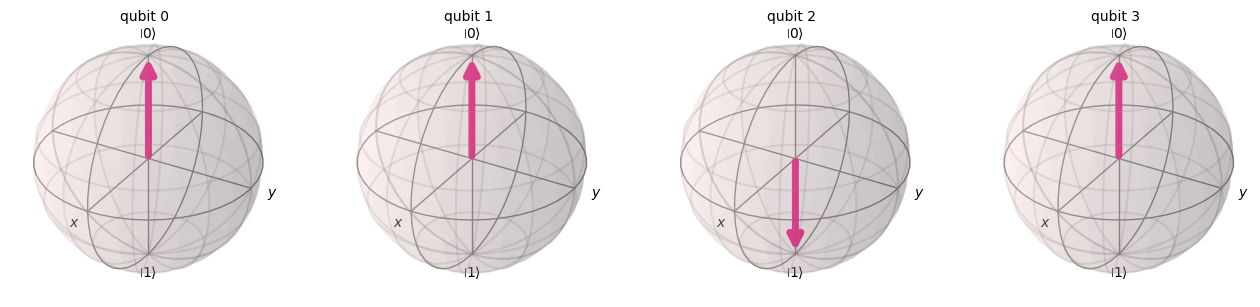

Output Quibit Bloch Diagram Incrementing 4 by 1:


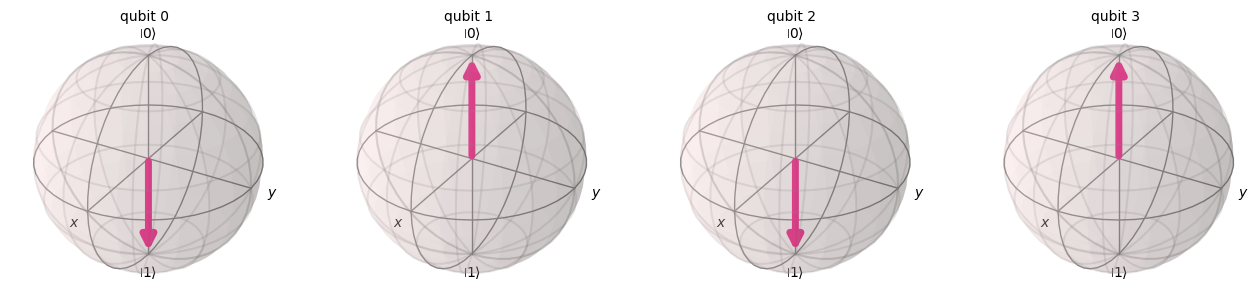

Circuit for incrementing 4 by 1:


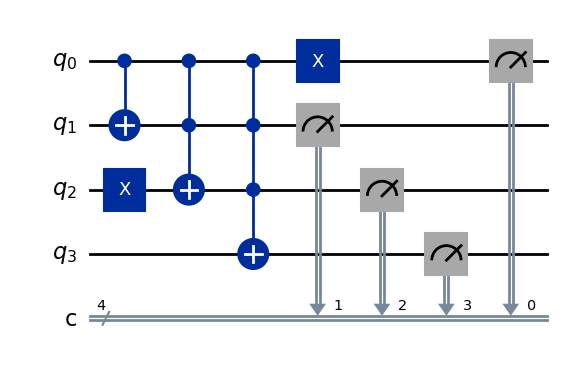

Input Quibit Bloch Diagram Incrementing 4 by 5:


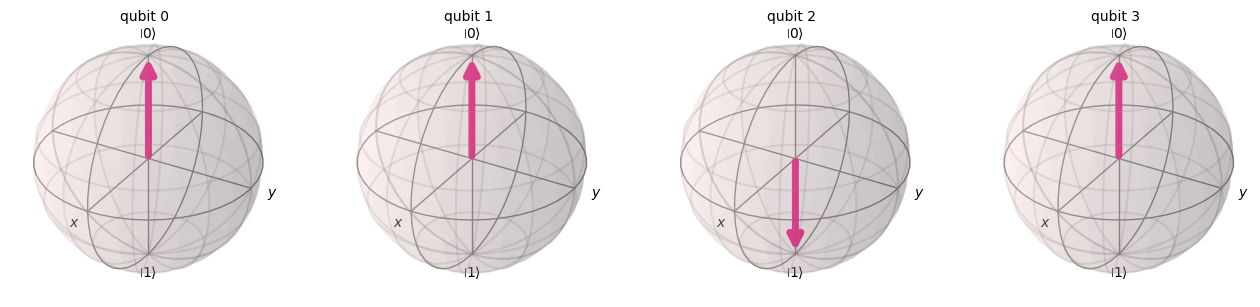

Output Quibit Bloch Diagram Incrementing 4 by 5:


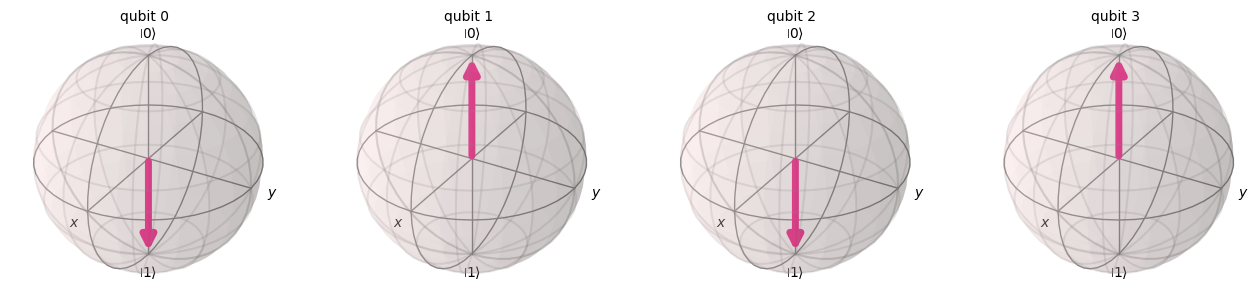

Circuit for incrementing by 5 (input_value=4):


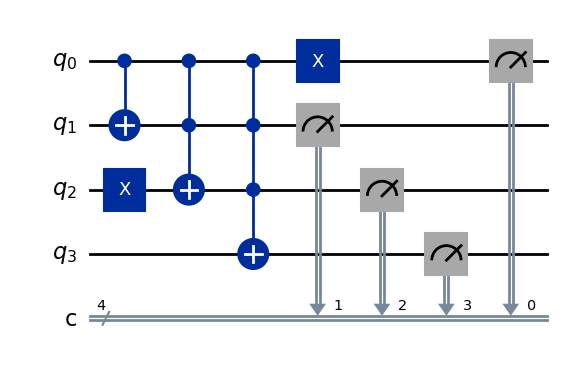

Input Quibit Bloch Diagram Incrementing 4 by 6:


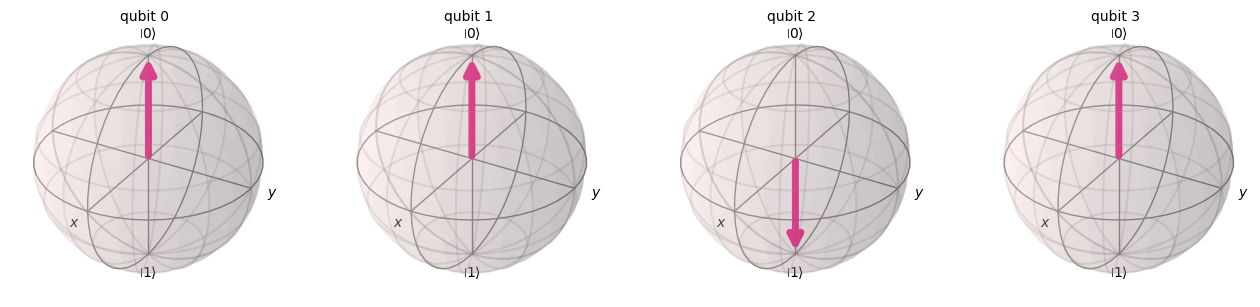

Output Quibit Bloch Diagram Incrementing 4 by 6:


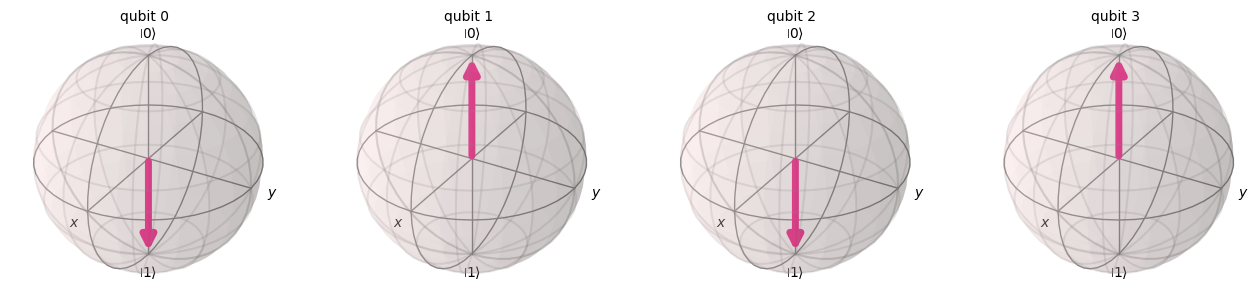

Circuit for incrementing by 6 (input_value=4):


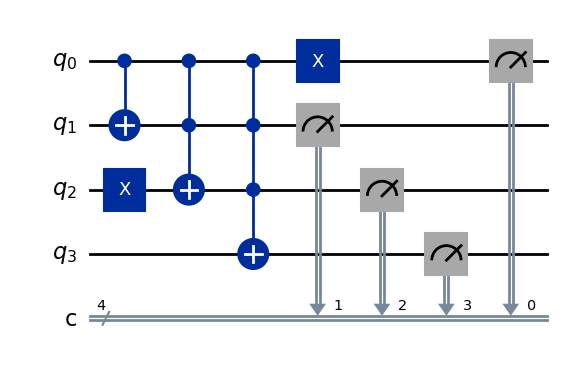

Input Quibit Bloch Diagram Incrementing 4 by 10:


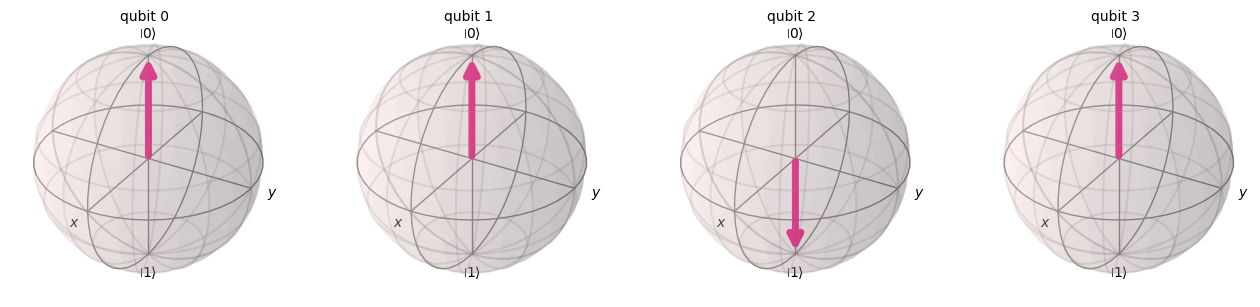

Output Quibit Bloch Diagram Incrementing 4 by 10:


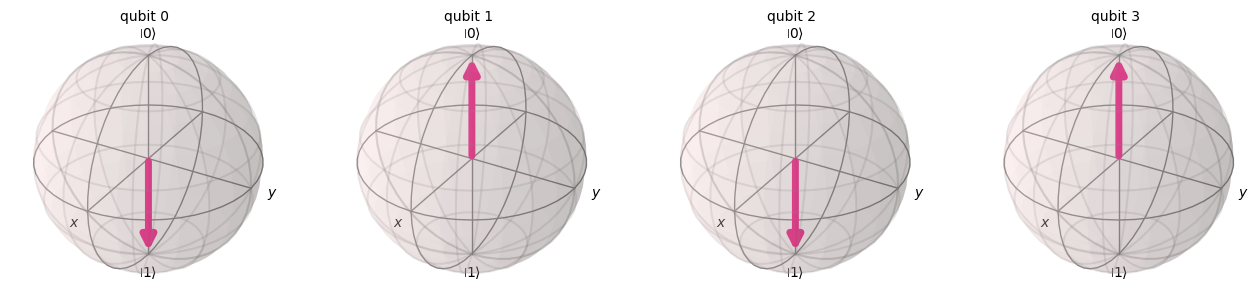

Circuit for incrementing by 10 (input_value=4):


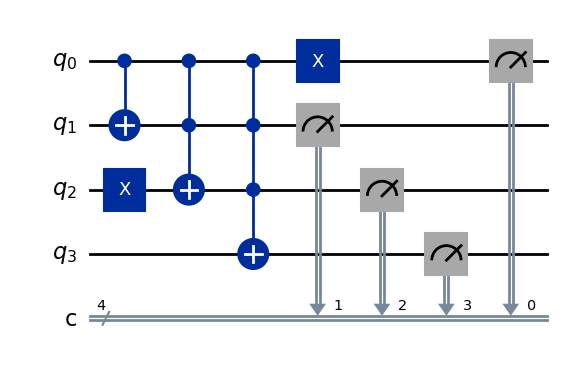

Circuit for incrementing 0 by 5:
Input Output Table incrementing 0 by 5:


<IPython.core.display.Math object>

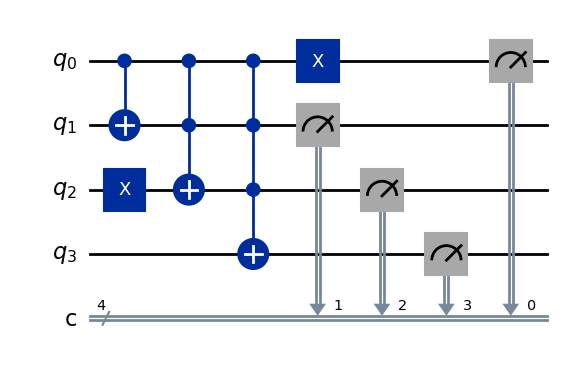

Circuit for incrementing 0 by 6:
Input Output Table incrementing 0 by 6:


<IPython.core.display.Math object>

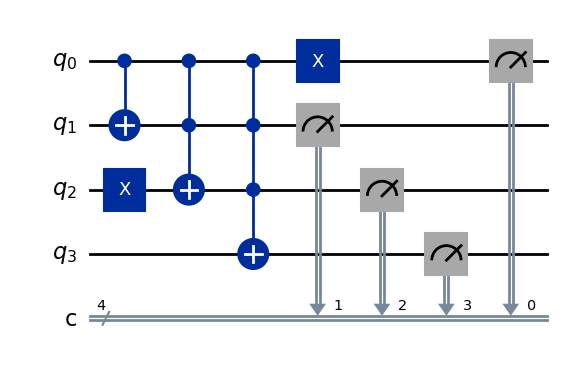

Circuit for incrementing 0 by 10:
Input Output Table incrementing 0 by 10:


<IPython.core.display.Math object>

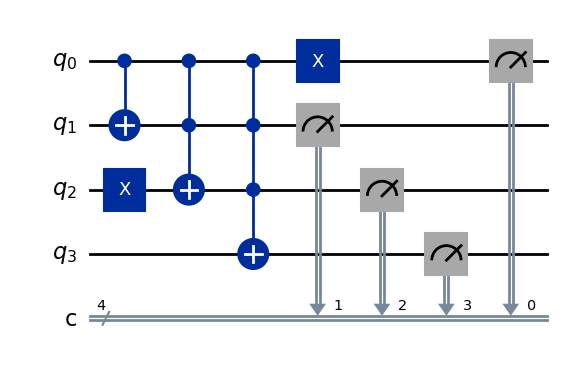

Circuit for incrementing 1 by 5:
Input Output Table incrementing 1 by 5:


<IPython.core.display.Math object>

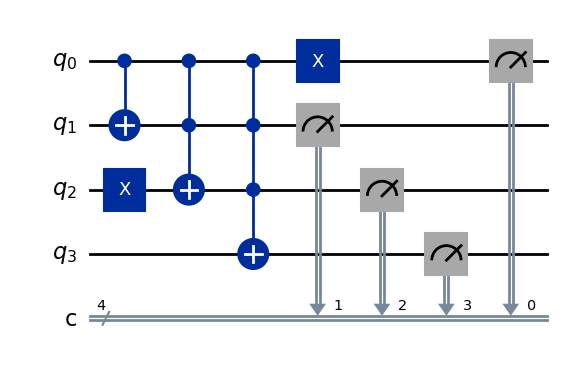

Circuit for incrementing 1 by 6:
Input Output Table incrementing 1 by 6:


<IPython.core.display.Math object>

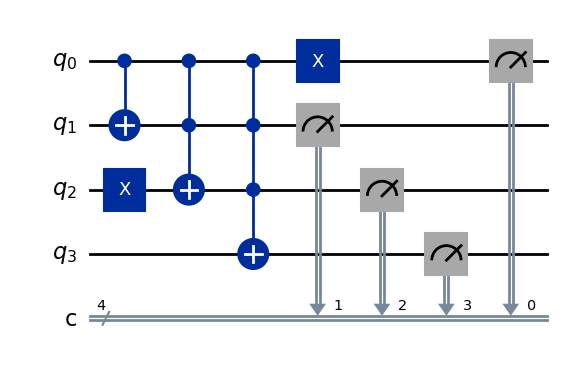

Circuit for incrementing 1 by 10:
Input Output Table incrementing 1 by 10:


<IPython.core.display.Math object>

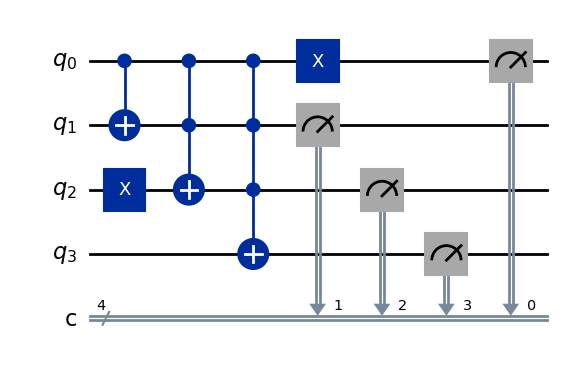

Circuit for incrementing 2 by 5:
Input Output Table incrementing 2 by 5:


<IPython.core.display.Math object>

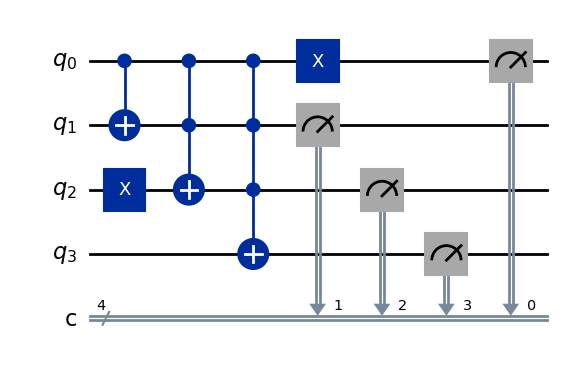

Circuit for incrementing 2 by 6:
Input Output Table incrementing 2 by 6:


<IPython.core.display.Math object>

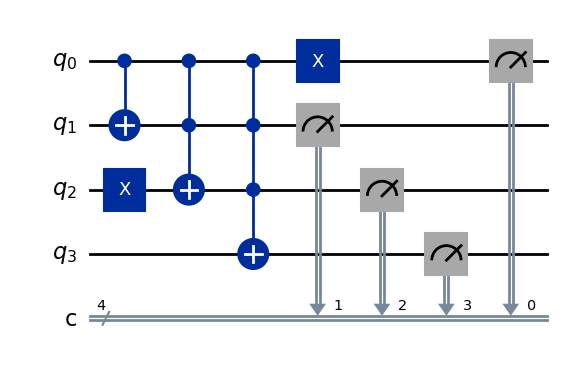

Circuit for incrementing 2 by 10:
Input Output Table incrementing 2 by 10:


<IPython.core.display.Math object>

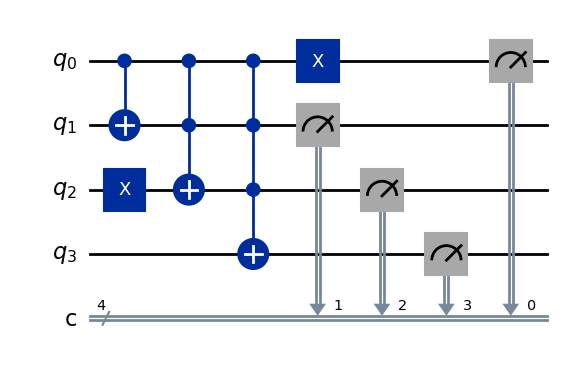

Circuit for incrementing 3 by 5:
Input Output Table incrementing 3 by 5:


<IPython.core.display.Math object>

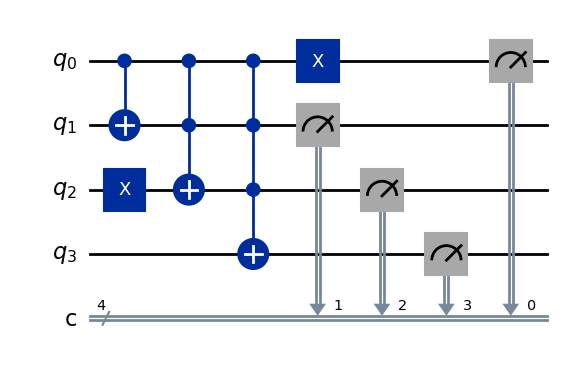

Circuit for incrementing 3 by 6:
Input Output Table incrementing 3 by 6:


<IPython.core.display.Math object>

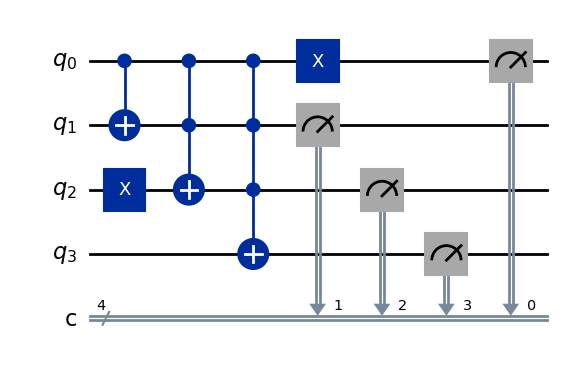

Circuit for incrementing 3 by 10:
Input Output Table incrementing 3 by 10:


<IPython.core.display.Math object>

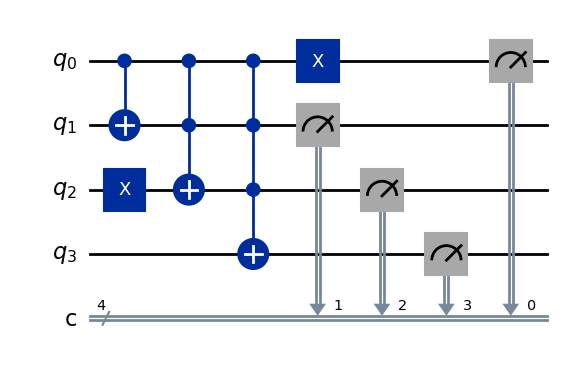

Circuit for incrementing 4 by 5:
Input Output Table incrementing 4 by 5:


<IPython.core.display.Math object>

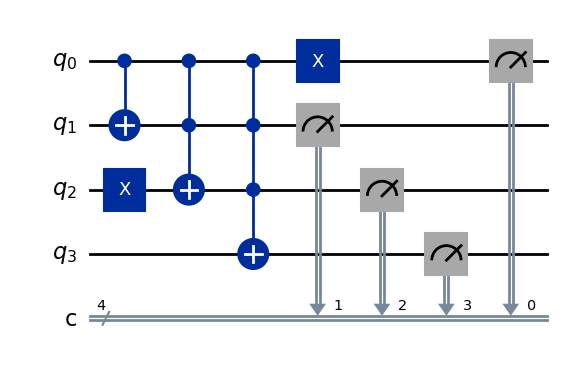

Circuit for incrementing 4 by 6:
Input Output Table incrementing 4 by 6:


<IPython.core.display.Math object>

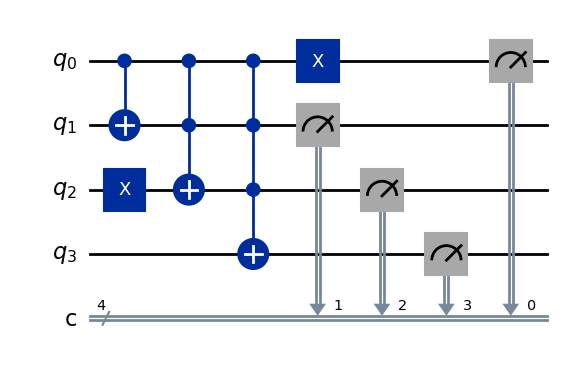

Circuit for incrementing 4 by 10:
Input Output Table incrementing 4 by 10:


<IPython.core.display.Math object>

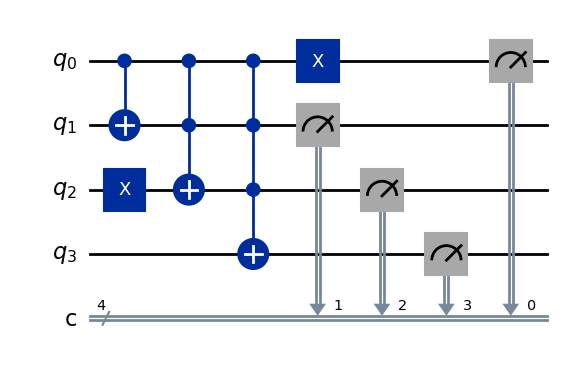

Circuit for incrementing 5 by 5:
Input Output Table incrementing 5 by 5:


<IPython.core.display.Math object>

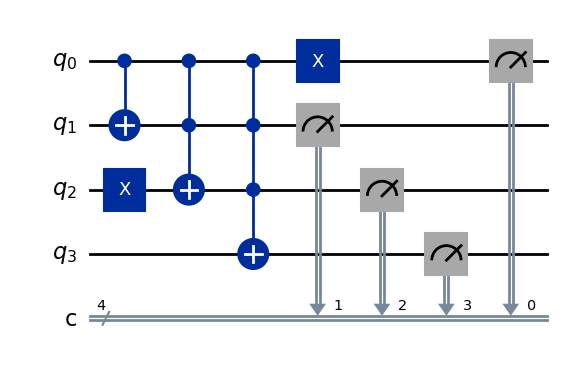

Circuit for incrementing 5 by 6:
Input Output Table incrementing 5 by 6:


<IPython.core.display.Math object>

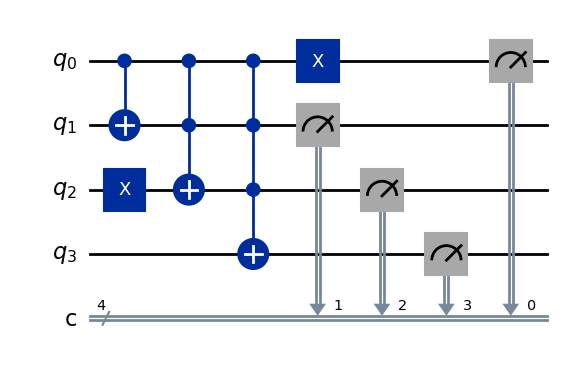

Circuit for incrementing 5 by 10:
Input Output Table incrementing 5 by 10:


<IPython.core.display.Math object>

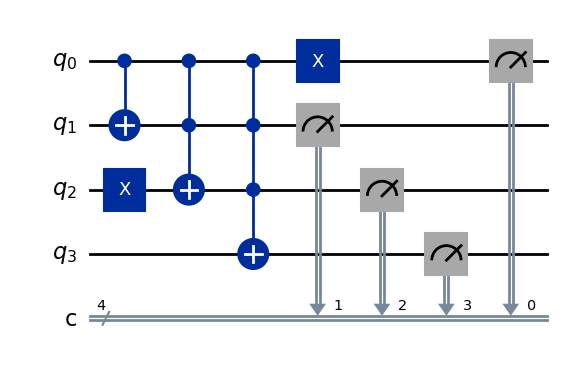

Circuit for incrementing 6 by 5:
Input Output Table incrementing 6 by 5:


<IPython.core.display.Math object>

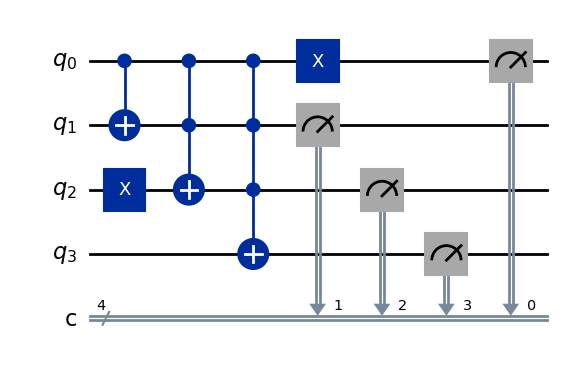

Circuit for incrementing 6 by 6:
Input Output Table incrementing 6 by 6:


<IPython.core.display.Math object>

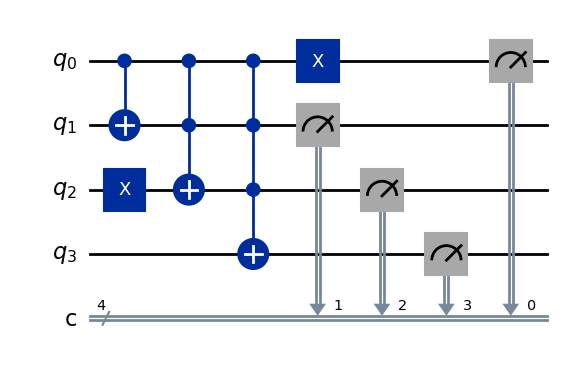

Circuit for incrementing 6 by 10:
Input Output Table incrementing 6 by 10:


<IPython.core.display.Math object>

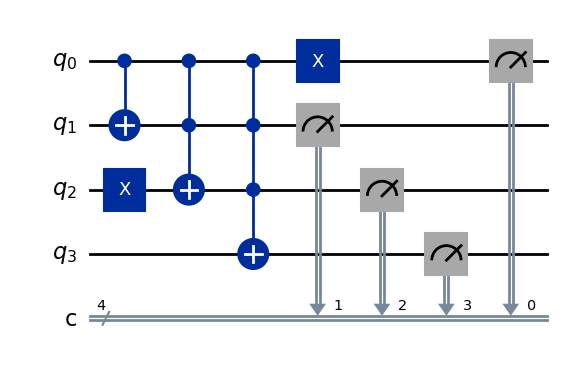

Circuit for incrementing 7 by 5:
Input Output Table incrementing 7 by 5:


<IPython.core.display.Math object>

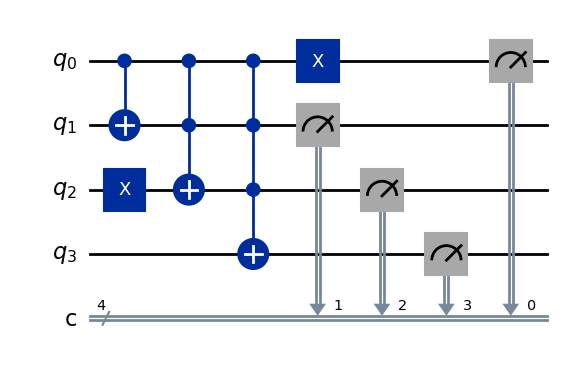

Circuit for incrementing 7 by 6:
Input Output Table incrementing 7 by 6:


<IPython.core.display.Math object>

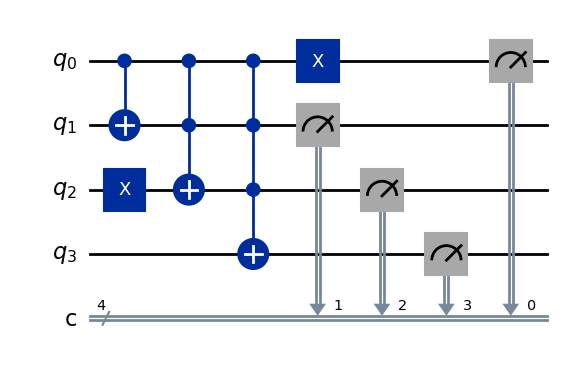

Circuit for incrementing 7 by 10:
Input Output Table incrementing 7 by 10:


<IPython.core.display.Math object>

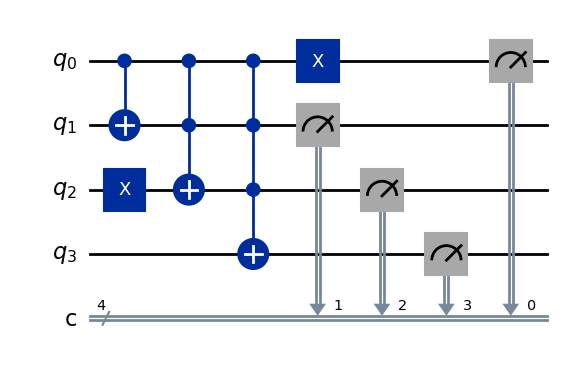

Circuit for incrementing 8 by 5:
Input Output Table incrementing 8 by 5:


<IPython.core.display.Math object>

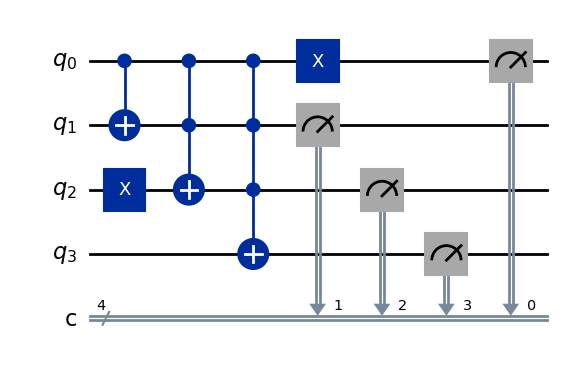

Circuit for incrementing 8 by 6:
Input Output Table incrementing 8 by 6:


<IPython.core.display.Math object>

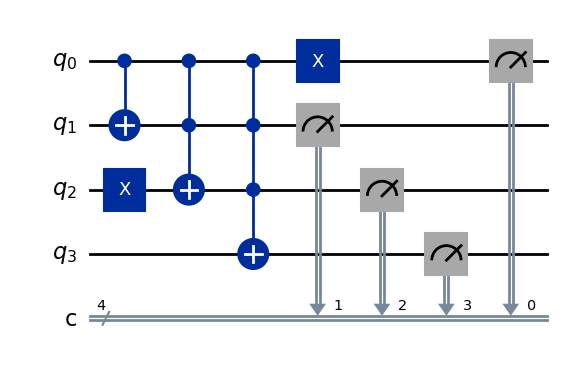

Circuit for incrementing 8 by 10:
Input Output Table incrementing 8 by 10:


<IPython.core.display.Math object>

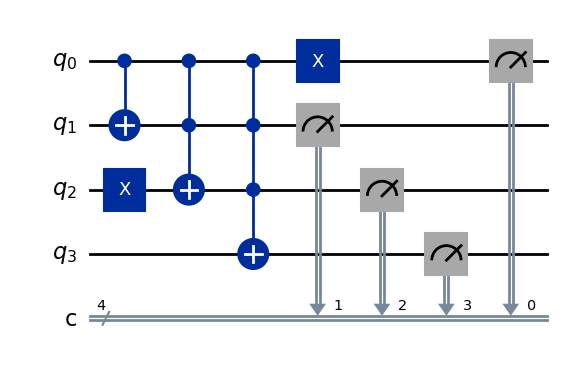

Circuit for incrementing 9 by 5:
Input Output Table incrementing 9 by 5:


<IPython.core.display.Math object>

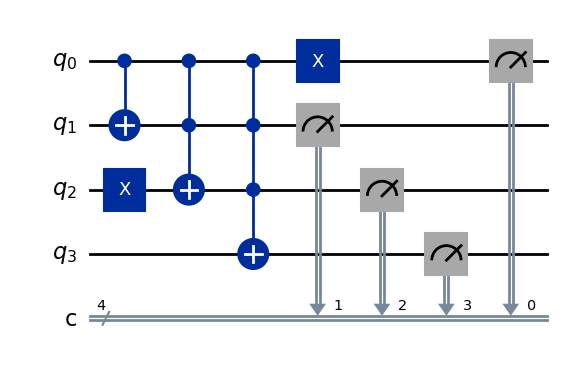

Circuit for incrementing 9 by 6:
Input Output Table incrementing 9 by 6:


<IPython.core.display.Math object>

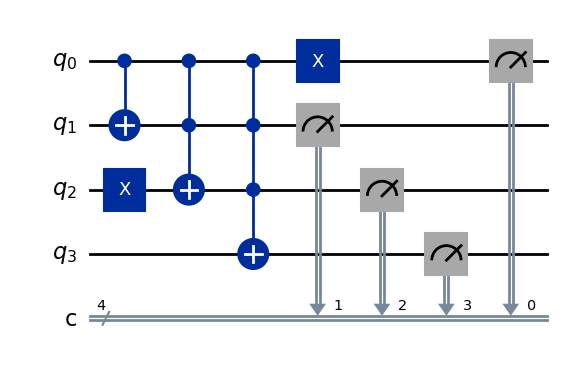

Circuit for incrementing 9 by 10:
Input Output Table incrementing 9 by 10:


<IPython.core.display.Math object>

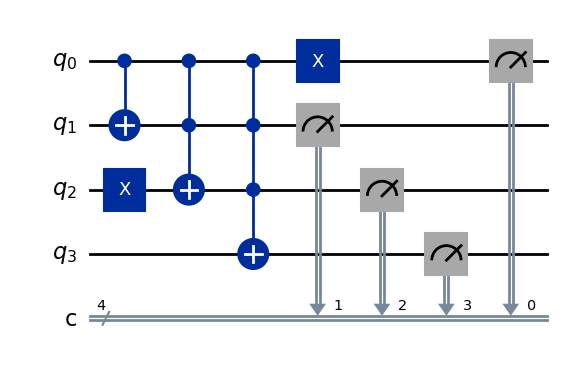

Circuit for incrementing 10 by 5:
Input Output Table incrementing 10 by 5:


<IPython.core.display.Math object>

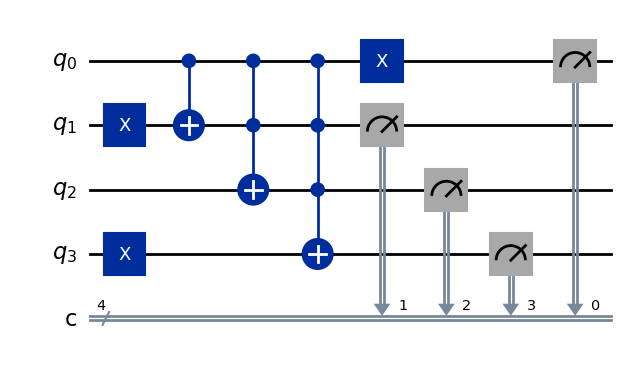

Circuit for incrementing 10 by 6:
Input Output Table incrementing 10 by 6:


<IPython.core.display.Math object>

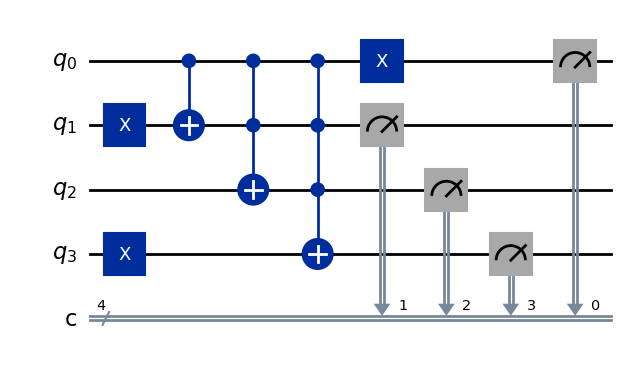

Circuit for incrementing 10 by 10:
Input Output Table incrementing 10 by 10:


<IPython.core.display.Math object>

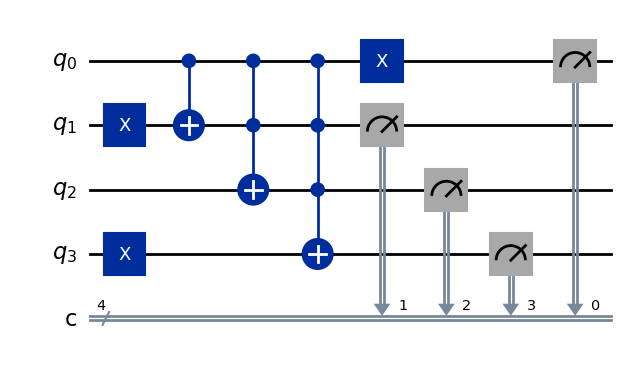

Circuit for incrementing 11 by 5:
Input Output Table incrementing 11 by 5:


<IPython.core.display.Math object>

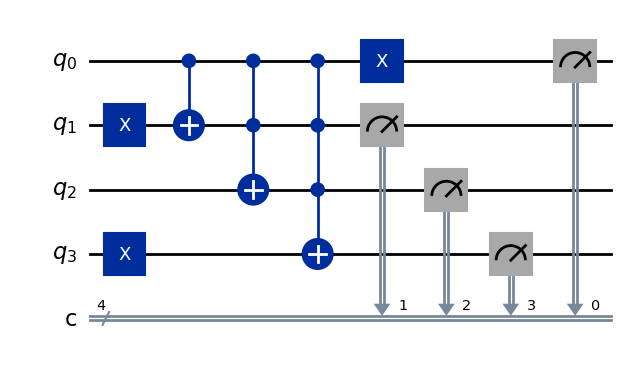

Circuit for incrementing 11 by 6:
Input Output Table incrementing 11 by 6:


<IPython.core.display.Math object>

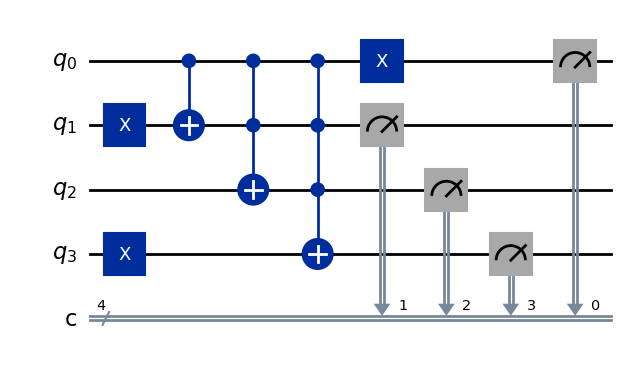

Circuit for incrementing 11 by 10:
Input Output Table incrementing 11 by 10:


<IPython.core.display.Math object>

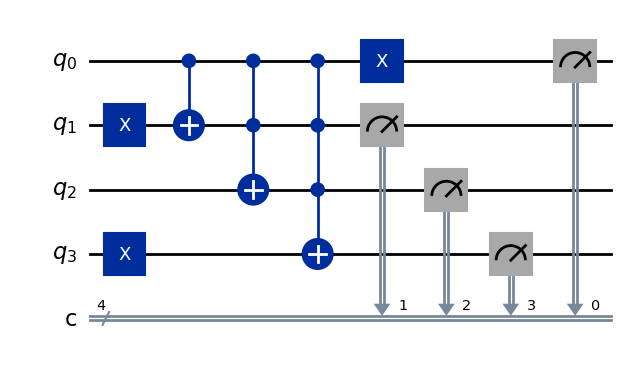

Circuit for incrementing 12 by 5:
Input Output Table incrementing 12 by 5:


<IPython.core.display.Math object>

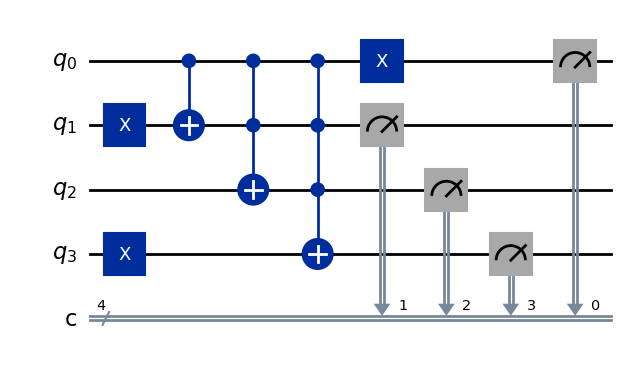

Circuit for incrementing 12 by 6:
Input Output Table incrementing 12 by 6:


<IPython.core.display.Math object>

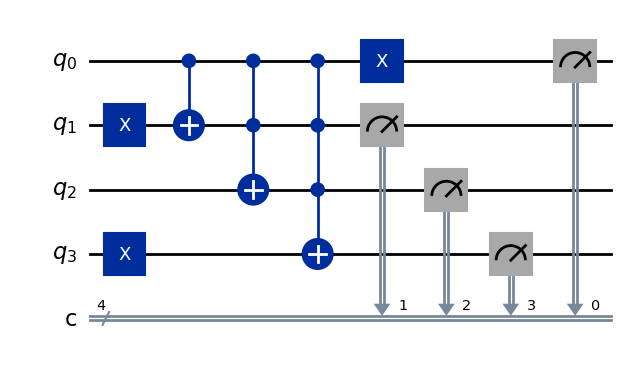

Circuit for incrementing 12 by 10:
Input Output Table incrementing 12 by 10:


<IPython.core.display.Math object>

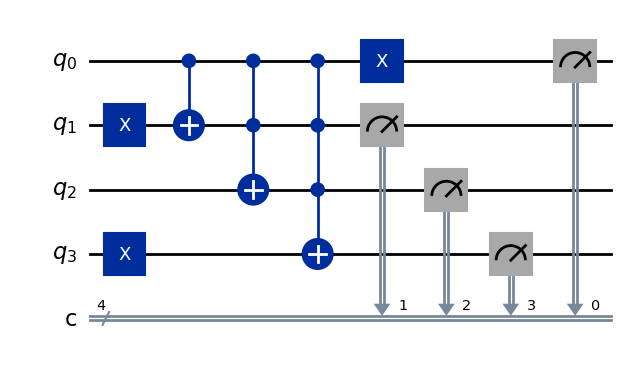

Circuit for incrementing 13 by 5:
Input Output Table incrementing 13 by 5:


<IPython.core.display.Math object>

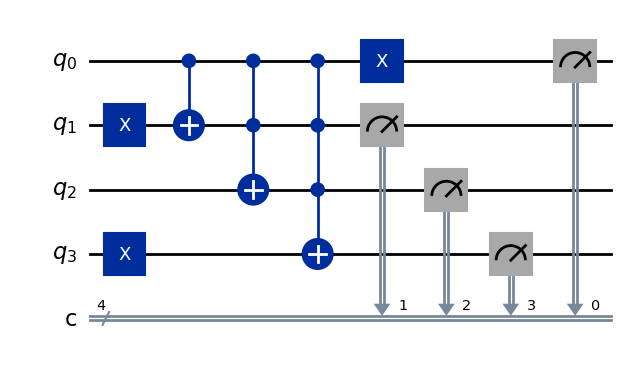

Circuit for incrementing 13 by 6:
Input Output Table incrementing 13 by 6:


<IPython.core.display.Math object>

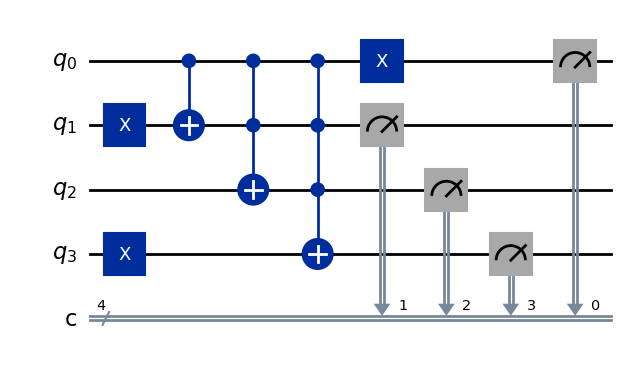

Circuit for incrementing 13 by 10:
Input Output Table incrementing 13 by 10:


<IPython.core.display.Math object>

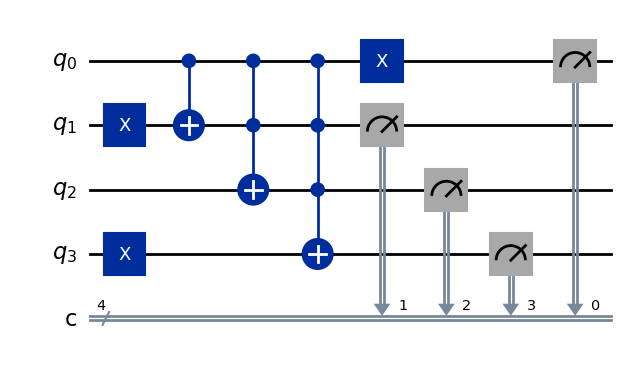

Circuit for incrementing 14 by 5:
Input Output Table incrementing 14 by 5:


<IPython.core.display.Math object>

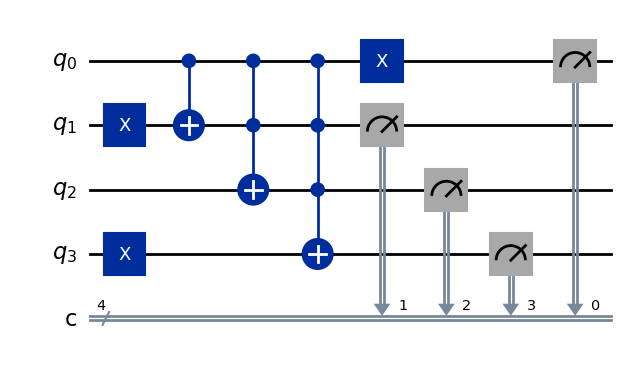

Circuit for incrementing 14 by 6:
Input Output Table incrementing 14 by 6:


<IPython.core.display.Math object>

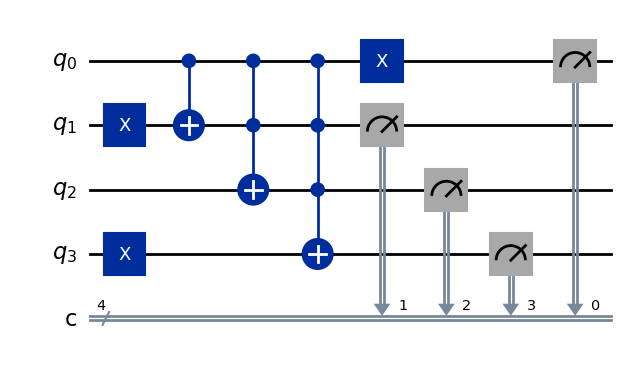

Circuit for incrementing 14 by 10:
Input Output Table incrementing 14 by 10:


<IPython.core.display.Math object>

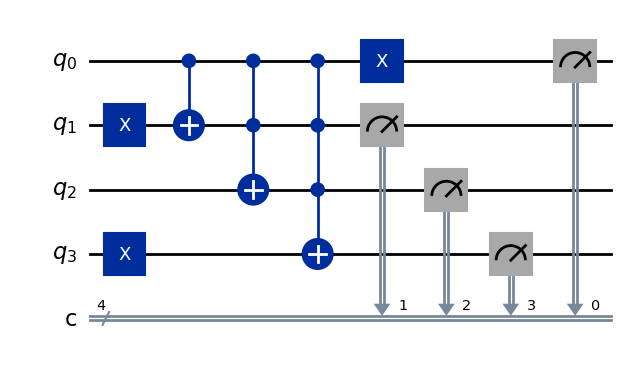

Circuit for incrementing 15 by 5:
Input Output Table incrementing 15 by 5:


<IPython.core.display.Math object>

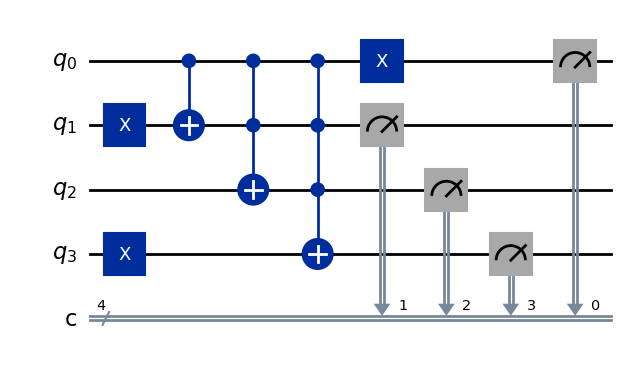

Circuit for incrementing 15 by 6:
Input Output Table incrementing 15 by 6:


<IPython.core.display.Math object>

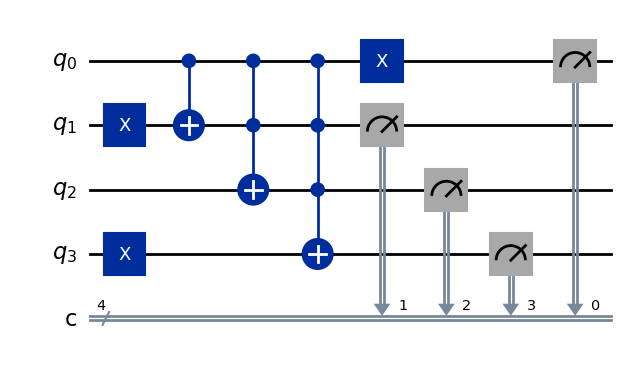

Circuit for incrementing 15 by 10:
Input Output Table incrementing 15 by 10:


<IPython.core.display.Math object>

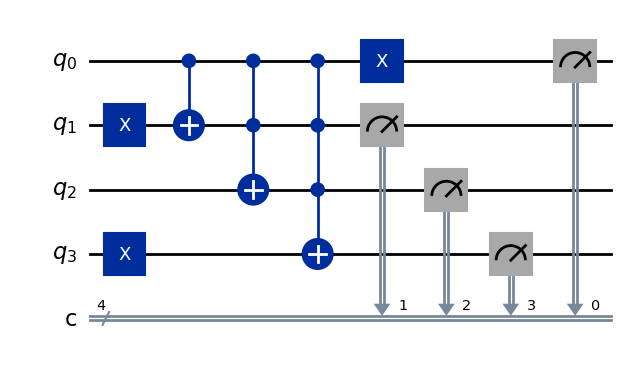

In [30]:
from IPython.display import display, Math

def increment_4bit_qc(input_value: int, increment: int, display_mode: str = "bloch"):
    """
    Create a quantum circuit that adds a fixed 4-bit unsigned integer to a 4-qubit input.
    
    Parameters:
        input_value (int): The initial 4-bit unsigned integer.
        increment (int): The unsigned 4-bit integer value to add.
        display_mode (str): "bloch" to display Bloch sphere visualization,
                           "table" to display qubit states in table format.
    
    Returns:
        QuantumCircuit: The quantum circuit implementing the increment operation using mcx gates.
    """
    if not (0 <= input_value <= 15):
        raise ValueError("Input value must be a 4-bit unsigned integer (0 to 15).")
    if not (0 <= increment <= 15):
        raise ValueError("Increment must be a 4-bit unsigned integer (0 to 15).")
    
    qr = QuantumRegister(4, 'q')  # 4-qubit register for the number
    cr = ClassicalRegister(4, 'c')  # Classical register for measurement
    qc = QuantumCircuit(qr, cr)
    
    # --- Set up the quantum input state to match the parameter input_value ---
    binary_input = f"{input_value:04b}"[::-1]  # Reverse for little-endian order
    initial_state = Statevector.from_int(input_value, 2**4)  # Represents the 4-qubit input state
    
    for i in range(4):
        if binary_input[i] == '1':
            qc.x(qr[i])
    
    # Perform increment using mcx gates for efficiency
    for i in range(3):  # Iterate through bits for carry propagation
        qc.mcx(qr[:i+1], qr[i+1])  # Multi-controlled X to handle binary carry
    
    qc.x(qr[0])  # Flip the least significant bit to perform +1
    
    # Simulate Circuit Final State
    final_state = Statevector(qc)
    final_binary_state = f"{(input_value + increment) % 16:04b}"[::-1]
    
    if display_mode == "table":
        print(f"Input Output Table incrementing {input_value} by {increment}:")
        latex_str = r"\begin{array}{|c|c|c|} \hline "
        latex_str += r"& \text{Initial Value} & \text{Final Value} \\ \hline "
        for i in range(4):
            initial_qubit = binary_input[::-1][i]
            final_qubit = final_binary_state[::-1][i]
            latex_str += fr"Qubit {i} & |{initial_qubit}\rangle & |{final_qubit}\rangle \\ \hline "
        latex_str += r"\end{array}"
        display(Math(latex_str))

    else:
        print(f"Input Quibit Bloch Diagram Incrementing {input_value} by {increment}:")
        display(plot_bloch_multivector(initial_state))
        print(f"Output Quibit Bloch Diagram Incrementing {input_value} by {increment}:")
        display(plot_bloch_multivector(final_state))
    
    # Measure the qubits
    qc.measure(qr, cr)
    return qc

# Demonstrate for input value 4 and increment value 1
input_value = 4
increment_value = 1
qc = increment_4bit_qc(input_value, increment_value, display_mode="bloch")
print(f"Circuit for incrementing {input_value} by {increment_value}:")
display(qc.draw('mpl'))
    
# Demonstrate for increment values 5, 6, and 10
increment_values = [5, 6, 10]
circuits = {}
for inc in increment_values:
    circuits[inc] = increment_4bit_qc(4, inc, display_mode="bloch")  # Use input value 4 as example
    print(f"Circuit for incrementing by {inc} (input_value=4):")
    display(circuits[inc].draw('mpl'))

for input_value2 in range(0,16):
    for inc2 in increment_values:
        print(f"Circuit for incrementing {input_value2} by {inc2}:")
        circuits[input_value2] = increment_4bit_qc(input_value2, inc2, display_mode="table")
        display(circuits[inc].draw('mpl'))


----
#### Exercise 2.2 (20%)

Define a **function** that contructs a circuit to test whether a four-qubit input is equal to a specified $4$-bit value ($n$). The circuit will use five qubits: four for the register to test, and one for the result.

Draw the circuit returned by the function for $n = 6$. Show the result of running the circuit on an input state that is an *equal superposition* of all computational basis states.

Quantum circuit for testing if a 4-qubit input equals 6:


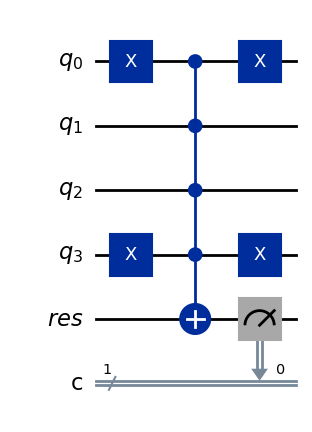

Measurement results:


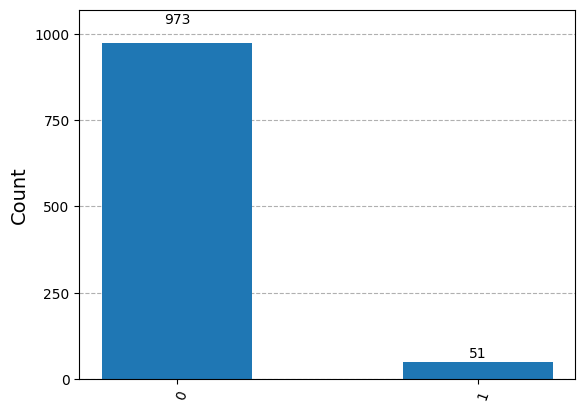

In [19]:
def equality_test_4bit(n: int):
    """
    Constructs a quantum circuit that tests if a four-qubit input is equal to a specified 4-bit value n.
    
    Parameters:
        n (int): The 4-bit value to test against (0 <= n <= 15).
    
    Returns:
        QuantumCircuit: The quantum circuit implementing the equality test.
    """
    if not (0 <= n <= 15):
        raise ValueError("n must be a 4-bit unsigned integer (0 to 15).")
    
    qr = QuantumRegister(4, 'q')  # Four qubits for the input
    result = QuantumRegister(1, 'res')  # One qubit to store the result
    cr = ClassicalRegister(1, 'c')  # Classical register for measurement
    qc = QuantumCircuit(qr, result, cr)
    
    # Encode n using X gates to flip matching bits
    binary_n = f"{n:04b}"[::-1]  # Reverse for little-endian ordering
    for i in range(4):
        if binary_n[i] == '0':
            qc.x(qr[i])
    
    # Apply multi-controlled NOT (mcx) to set result qubit if all qubits match n
    qc.mcx(qr, result[0])
    
    # Uncompute encoding to restore qubits to their original state
    for i in range(4):
        if binary_n[i] == '0':
            qc.x(qr[i])
    
    # Measure result qubit
    qc.measure(result, cr)
    
    return qc

# Generate and draw the circuit for n = 6
qc_n6 = equality_test_4bit(6)
print("Quantum circuit for testing if a 4-qubit input equals 6:")
display(qc_n6.draw('mpl'))

# Prepare equal superposition over 4 qubits
qr_test = QuantumRegister(4, 'q')
result = QuantumRegister(1, 'res')
cr = ClassicalRegister(1, 'c')
qc_test = QuantumCircuit(qr_test, result, cr)

qc_test.h(qr_test)  # Apply Hadamard gates for superposition
qc_test.compose(equality_test_4bit(6), inplace=True)  # Apply equality test

# Run simulation
simulator = AerSimulator()
job = simulator.run(transpile(qc_test, simulator), shots=1024)
counts = job.result().get_counts()

# Display the results
print("Measurement results:")
display(plot_histogram(counts))


----
#### Exercise 2.3 (25%)

Using the functions from 2.1 and 2.2 as building blocks, define a **function** that builds a circuit that has two four-qubit quantum registers -- we'll call them $a$ and $b$. The function should include a 4-bit unsigned integer ($n$), and it should increment $b$ by $n$ if and only if $a = n$.  The arguments to your function will be two `QuantumRegister` objects and the integer $n$.

The extra qubit used for the equality test (2.2) should not be included in the parameters of your function. That qubit will be created and used by your function, but will not be provided by the caller of your function. In other words, this is an *ancilla* qubit that is only used for a temporary purpose.

Demonstrate the circuit.

Initial Circuit States: Incrementing 0 by 6:


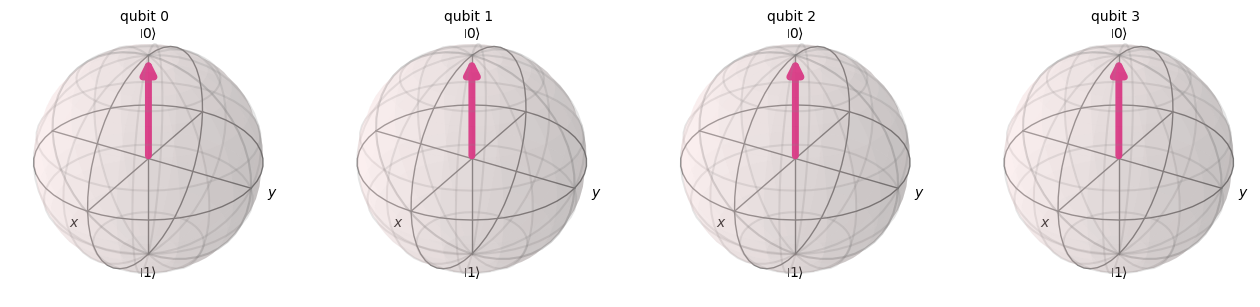

Final Circuit States: Incrementing 0 by 6:


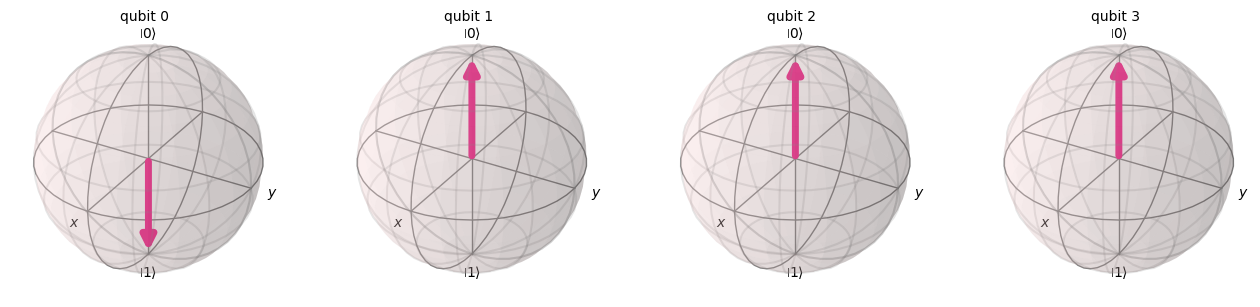

Quantum circuit for conditional increment when a = 6:


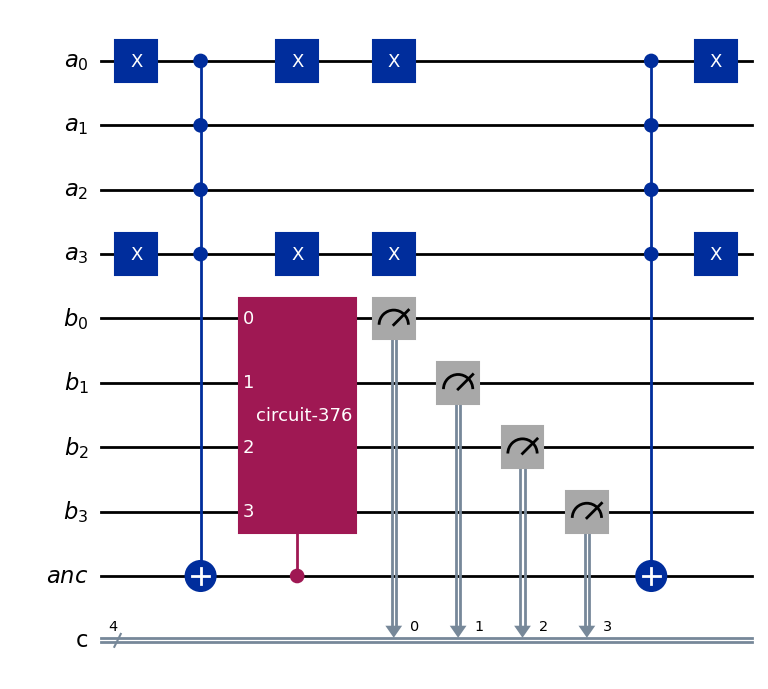

In [20]:
def conditional_increment(a: QuantumRegister, b: QuantumRegister, n: int):
    """
    Constructs a circuit that increments the 4-qubit register b by n if and only if register a equals n.
    
    Parameters:
        a (QuantumRegister): The 4-qubit register to check.
        b (QuantumRegister): The 4-qubit register to increment.
        n (int): The unsigned 4-bit integer value.
    
    Returns:
        QuantumCircuit: The quantum circuit implementing the conditional increment.
    """
    if not (0 <= n <= 15):
        raise ValueError("n must be a 4-bit unsigned integer (0 to 15).")
    
    anc = QuantumRegister(1, 'anc')  # Ancilla qubit for equality test
    cr = ClassicalRegister(4, 'c')  # Classical register for measurement
    qc = QuantumCircuit(a, b, anc, cr)
    
    # Apply equality test on register a
    equality_circuit = equality_test_4bit(n)
    equality_circuit.remove_final_measurements()  # Remove classical measurement from equality test
    qc.compose(equality_circuit, qubits=a[:] + [anc[0]], inplace=True)
    
    # Increment b if a = n (controlled on ancilla qubit)
    increment_circuit = increment_4bit_qc(0, n)
    increment_circuit.remove_final_measurements()  # Ensure increment circuit is unitary
    increment_gate = increment_circuit.to_gate().control(1)
    
    qc.append(increment_gate, [anc[0]] + b[:])
    
    # Reset ancilla state to 0
    qc.compose(equality_circuit, qubits=a[:] + [anc[0]], inplace=True)
    
    # Measure register b
    qc.measure(b, cr)
    
    return qc

# Demonstrate circuit
qa = QuantumRegister(4, 'a')
qb = QuantumRegister(4, 'b')
qc_demo = conditional_increment(qa, qb, 6)
print("Quantum circuit for conditional increment when a = 6:")
display(qc_demo.draw('mpl'))


----
#### Exercise 2.4 (25%)

Define a **function** that creates a quantum circuit that creates a 4-qubit equal superposition of computational basis states and then selectively changes the phase of a designated set of basis states. The function has one parameter: a list of integer values that specify the computational bases that will be phase-shifted.  (You may assume that the values are 4-bit integers (0-15).)

For this assignment, the desired phase shift is $90^\circ$ (or $\pi/2$).

For example, suppose the argument is `[2, 9]`.  The output is an equal superposition of $|0\rangle$ through $|15\rangle$ (hint: Hadamard gates!) and states $|2\rangle$ and $|9\rangle$ will be rotated by $\pi/2$.

Draw the circuit and demonstrate that it works correctly for at least two different "interesting" lists. (Consider how to clearly display that the circuit performs correctly.)

You may define additional functions, if desired, and you may use functions that were defined in previous exercises.